# Teste SpaceTime Labs

----

## Questão 1

In [301]:
def conta_ruas_lockdown(N, A, B):
    j=0
    for i in range(N+1)[1:]:
        j = (j+1) if any([i%A ==0,i%B == 0]) else j
    return j

In [302]:
print(conta_ruas_lockdown(10, 2, 3))
print(conta_ruas_lockdown(50, 5, 7))
print(conta_ruas_lockdown(1000000, 28, 32))

7
16
62500


------

## Questão 2

**Descrição do dataset**:

* bloco: identificador da região de plantação e colheita de cana de açúcar
* talhao: identificador da sub-região de plantação e colheita de cana de açúcar (um bloco contém vários
talhões)
* safra: ano que a cana de açúcar foi colhida
* area: tamanho da área colhida em hectares
* data_colheita: data em que a cana de açúcar foi colhida
* tch_bloco: Toneladas de Cana por Hectare colhida referente ao bloco
* NDVI_b01: NDVI (Normalized De Vegetation Index), e o “b01” corresponde ao índice médio relativo ao primeiro mês antes da colheita
* NDVI_bN: NDVI médio relativo ao N-ésimo mês antes da colheita

**Objetivo do projeto**: Desenvolver um modelo capaz de prever o TCH dos blocos do dataset para a safra de 2021.

### Importação dos dados

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_rows', 115)

In [304]:
df = pd.read_csv(r'/Users/leuzinger/Dropbox/Data Science/Case SpaceTime Labs/dataset_case_DS.csv')

In [305]:
df.head()

,Unnamed: 0,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
0,0,1239,1,2015,15.53,2015-10-25 00:00:00,75.88,0.622972,NaN,0.712402,0.693089,0.743105,0.805768,0.711357,0.767734,0.650449,NaN,0.241302,NaN
1,1,1243,1,2015,13.69,2015-07-14 00:00:00,65.22,0.677335,NaN,0.651432,NaN,0.721786,0.641068,NaN,0.337117,0.323262,0.289830,0.279747,0.262570
2,2,1243,2,2015,4.63,2015-07-15 00:00:00,65.22,0.632256,NaN,0.736531,0.560717,0.682829,0.582140,NaN,0.317600,0.298278,NaN,NaN,NaN
3,3,1243,7,2015,4.95,2015-07-16 00:00:00,65.22,0.570271,0.463221,0.702480,0.590163,0.664030,0.602534,NaN,0.386727,0.321662,NaN,NaN,NaN
4,4,1244,4,2015,8.66,2015-05-13 00:00:00,96.91,0.709576,0.454723,0.734945,0.722006,NaN,0.494456,0.401426,0.364672,0.367147,0.387163,0.452122,0.516717


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19870 entries, 0 to 19869
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     19870 non-null  int64  
 1   bloco          19870 non-null  int64  
 2   talhao         19870 non-null  int64  
 3   safra          19870 non-null  int64  
 4   area           16330 non-null  float64
 5   data_colheita  19755 non-null  object 
 6   tch_bloco      19838 non-null  float64
 7   NDVI_b01       18949 non-null  float64
 8   NDVI_b02       18829 non-null  float64
 9   NDVI_b03       18290 non-null  float64
 10  NDVI_b04       17487 non-null  float64
 11  NDVI_b05       16307 non-null  float64
 12  NDVI_b06       16422 non-null  float64
 13  NDVI_b07       16337 non-null  float64
 14  NDVI_b08       15798 non-null  float64
 15  NDVI_b09       15120 non-null  float64
 16  NDVI_b10       14647 non-null  float64
 17  NDVI_b11       13008 non-null  float64
 18  NDVI_b

In [307]:
df = df.drop('Unnamed: 0',axis=1)
df['data_colheita'] = pd.to_datetime(df['data_colheita'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19870 entries, 0 to 19869
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   bloco          19870 non-null  int64         
 1   talhao         19870 non-null  int64         
 2   safra          19870 non-null  int64         
 3   area           16330 non-null  float64       
 4   data_colheita  19755 non-null  datetime64[ns]
 5   tch_bloco      19838 non-null  float64       
 6   NDVI_b01       18949 non-null  float64       
 7   NDVI_b02       18829 non-null  float64       
 8   NDVI_b03       18290 non-null  float64       
 9   NDVI_b04       17487 non-null  float64       
 10  NDVI_b05       16307 non-null  float64       
 11  NDVI_b06       16422 non-null  float64       
 12  NDVI_b07       16337 non-null  float64       
 13  NDVI_b08       15798 non-null  float64       
 14  NDVI_b09       15120 non-null  float64       
 15  NDVI_b10       1464

In [308]:
df.head()

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
0,1239,1,2015,15.53,2015-10-25,75.88,0.622972,NaN,0.712402,0.693089,0.743105,0.805768,0.711357,0.767734,0.650449,NaN,0.241302,NaN
1,1243,1,2015,13.69,2015-07-14,65.22,0.677335,NaN,0.651432,NaN,0.721786,0.641068,NaN,0.337117,0.323262,0.289830,0.279747,0.262570
2,1243,2,2015,4.63,2015-07-15,65.22,0.632256,NaN,0.736531,0.560717,0.682829,0.582140,NaN,0.317600,0.298278,NaN,NaN,NaN
3,1243,7,2015,4.95,2015-07-16,65.22,0.570271,0.463221,0.702480,0.590163,0.664030,0.602534,NaN,0.386727,0.321662,NaN,NaN,NaN
4,1244,4,2015,8.66,2015-05-13,96.91,0.709576,0.454723,0.734945,0.722006,NaN,0.494456,0.401426,0.364672,0.367147,0.387163,0.452122,0.516717


### Limpeza dos dados

Verificamos que o dataset tem muitos valores em branco. Antes de decidir o que fazer com estes valores, é preciso examiná-los

In [309]:
df.isnull().sum()

bloco               0
talhao              0
safra               0
area             3540
data_colheita     115
tch_bloco          32
NDVI_b01          921
NDVI_b02         1041
NDVI_b03         1580
NDVI_b04         2383
NDVI_b05         3563
NDVI_b06         3448
NDVI_b07         3533
NDVI_b08         4072
NDVI_b09         4750
NDVI_b10         5223
NDVI_b11         6862
NDVI_b12         8242
dtype: int64

In [310]:
lista = df[(df.area.isnull()==True)]['bloco'].unique()
df[df.bloco.isin(lista)].sort_values(['bloco','talhao'])[:10]

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
4643,1236,1,2016,6.43,2016-07-12,101.68,0.660357,0.712407,0.682959,NaN,0.378934,NaN,NaN,0.432385,0.589786,0.564760,NaN,NaN
8080,1236,1,2017,6.43,2017-07-23,86.43,0.359089,0.683225,0.570371,0.722969,0.792568,NaN,NaN,NaN,0.589414,0.467347,0.446032,0.297526
11419,1236,1,2018,6.22,2018-07-27,60.10,0.509706,0.553962,0.648584,0.738972,0.792210,0.780096,NaN,0.656676,0.438491,0.348275,0.286659,0.285387
14748,1236,1,2019,6.43,2019-07-12,69.18,0.641126,0.699486,0.750493,0.690155,0.746051,0.662154,0.673212,0.534159,0.342282,0.267040,0.257505,NaN
16445,1236,1,2020,NaN,2020-10-04,51.90,0.384249,NaN,0.479729,0.564533,0.629845,0.717385,0.729278,NaN,0.660739,NaN,0.460468,0.383685
3800,1236,2,2016,3.42,2016-07-06,101.68,0.628659,0.628896,0.617167,0.527482,0.611054,NaN,NaN,0.371698,0.383678,0.318137,NaN,NaN
7207,1236,2,2017,3.42,2017-11-10,86.43,0.423355,0.425829,0.460654,0.487857,0.530614,0.552597,0.587656,0.648282,NaN,0.549427,NaN,NaN
10616,1236,2,2018,3.42,2018-07-25,60.10,0.479539,0.412658,0.575260,0.624209,0.661809,0.597908,NaN,0.315461,NaN,NaN,NaN,NaN
13917,1236,2,2019,3.42,2019-07-11,69.18,0.555392,0.616084,0.650106,0.632419,0.631893,0.557860,0.563994,0.446160,0.328467,0.301652,0.289698,NaN
16446,1236,2,2020,NaN,2020-11-05,51.90,0.167690,0.357762,0.373363,0.407766,0.482634,0.481337,0.547575,0.539551,0.591749,0.538537,NaN,0.381633


In [311]:
lista = df[(df.data_colheita.isnull()==True)]['bloco'].unique()
df[df.bloco.isin(lista)].sort_values(['bloco','talhao'])[:10]

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
3393,1318,1,2016,7.86,2016-10-24,46.46,0.541005,NaN,0.543375,0.624938,0.664672,0.619579,0.650427,0.587982,0.635573,NaN,NaN,NaN
10225,1318,1,2018,6.46,2018-07-08,139.39,0.667255,0.714403,0.753384,0.756028,0.673907,0.739257,0.581891,0.662200,0.611078,0.608620,0.677862,0.672090
13463,1318,1,2019,NaN,NaT,94.25,0.733818,0.742121,0.750504,0.709293,0.692059,NaN,0.504185,0.371439,0.320846,0.299756,NaN,NaN
16565,1318,1,2020,NaN,2020-10-22,84.50,0.408857,0.396095,0.472941,0.490616,0.529498,0.558046,0.633011,0.707958,NaN,0.671246,NaN,0.448816
3819,1318,2,2016,2.51,2016-10-22,46.46,0.538544,NaN,0.588504,0.621241,0.671270,0.608038,0.652931,0.641752,0.399441,NaN,NaN,NaN
12202,1318,2,2018,7.81,2018-07-08,139.39,0.696029,0.733771,0.766465,0.766945,0.662892,0.757443,0.523213,0.649017,0.603544,0.616227,0.680219,0.667862
15630,1318,2,2019,NaN,NaT,94.25,0.712241,0.745143,0.734060,0.681058,0.668439,NaN,0.511120,0.361319,0.314161,0.285863,NaN,NaN
16566,1318,2,2020,NaN,2020-10-18,84.50,0.409168,0.398943,0.473986,0.536752,0.517132,0.655842,0.694097,0.741326,NaN,0.684743,NaN,0.471911
5891,1318,3,2016,4.03,2016-10-24,46.46,0.520981,NaN,0.542252,0.590789,0.663539,0.579616,0.657354,0.563013,0.426595,NaN,NaN,NaN
10226,1318,3,2018,5.30,2018-07-09,139.39,0.682254,0.724838,0.766900,0.774900,0.668060,0.750179,0.496373,0.604408,0.532426,0.561839,0.633349,0.619208


In [312]:
lista = df[(df.tch_bloco.isnull()==True)]['bloco'].unique()
df[df.bloco.isin(lista)].sort_values(['bloco','talhao'])[:10]

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
1515,1357,1,2015,8.64,2015-06-12,104.28,0.560011,0.723784,NaN,0.753860,0.739095,0.574669,0.465178,0.442331,0.425564,0.509961,0.473171,0.465006
4660,1357,1,2016,8.92,2016-07-25,80.75,0.645183,0.689671,0.671252,0.711323,NaN,0.521723,NaN,NaN,NaN,0.459200,0.401939,0.328257
8108,1357,1,2017,8.92,2017-09-17,61.97,0.561801,0.605856,0.715280,0.694626,0.645020,0.714974,0.676409,0.754707,0.594936,0.512324,0.476257,0.339432
14771,1357,1,2019,NaN,NaT,NaN,NaN,0.448475,NaN,0.734450,NaN,0.663825,0.395827,0.371531,0.377227,0.457353,0.474648,0.508572
16646,1357,1,2020,NaN,2020-08-23,92.70,0.534981,0.629003,0.694800,0.778286,0.765914,0.787156,0.662749,NaN,NaN,0.501623,0.468881,0.499989
27,1357,2,2015,12.53,2015-06-12,104.28,0.606405,0.730581,NaN,0.770099,0.759300,0.537352,0.494894,0.480092,0.470438,0.540441,0.510380,0.500675
2950,1357,2,2016,13.89,2016-07-23,80.75,0.669249,0.708285,0.694450,0.728916,NaN,0.530665,NaN,NaN,NaN,0.482191,0.422526,0.351897
6310,1357,2,2017,13.89,2017-09-17,61.97,0.600781,0.637149,0.733459,0.698046,0.657977,0.737303,0.705674,0.764149,0.597411,0.527565,0.492013,0.366543
13068,1357,2,2019,NaN,NaT,NaN,NaN,0.507056,NaN,0.750507,NaN,0.679439,0.421968,0.407366,0.409763,0.478562,0.497599,0.529751
16647,1357,2,2020,NaN,2020-08-24,92.70,0.569449,0.650422,0.708424,0.780500,0.763065,0.792830,0.709250,NaN,NaN,0.556282,0.494241,0.511743


-------

Para o caso da data da colheita e do tch_bloco, não seria interessante tentar estimar os valores para as poucas linhas do dataset que estão sem valor. Nestes casos, é melhor remover estas linhas do dataset. **Vamos considerar que este tipo de linha é um erro no dataset, pois não são significativos para nossa análise e representam apenas 0,6% dos dados**.

Após excluir essas linhas, verificamos que todos os valores em branco referentes à variável 'área' são do ano de 2020. Mais importante ainda, não temos nenhum valor de área para 2020. **O problema é que sem a área do talhão, não é possível estabelecer uma relação entre os valores que estão definidos para o talhão (área, data da colheita e NDVI) e o valor da colheita que está calculada para o bloco**.

Se a área colhida fosse sempre a mesma em cada talhão ou em cada bloco, bastaria adotar esse valor. Contudo, não é esse o caso. Uma possível solução seria utilizar imputações estatítisticas ou o [KNN imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)) para estimar esse dado de área faltante. **Outra solução possível é usarmos os dados de 2020 como dados de teste e trabalhar os dados de treino para tornar o modelo independente desse dado da área. É essa a estratégia que adotaremos**.

Quanto aos valores em branco de NDVI para depois, vamos usar o KNN imputer para completar os dados, pois o modelo não funcionará sem isso. Contudo, para evitar vazamento de dados, vamos fazer o imputer apenas após a divisão do dataset.

----- 

In [313]:
df = df.dropna(subset=['data_colheita','tch_bloco']).reset_index(drop=True)
df.isnull().sum()

bloco               0
talhao              0
safra               0
area             3425
data_colheita       0
tch_bloco           0
NDVI_b01          897
NDVI_b02         1024
NDVI_b03         1554
NDVI_b04         2366
NDVI_b05         3558
NDVI_b06         3431
NDVI_b07         3532
NDVI_b08         4069
NDVI_b09         4730
NDVI_b10         5190
NDVI_b11         6814
NDVI_b12         8184
dtype: int64

In [314]:
df[(df.area.isnull()==True)]['safra'].unique()

array([2020])

In [315]:
'''
from sklearn.impute import SimpleImputer
dfi = df.copy()
imputer = SimpleImputer(strategy = 'most_frequent')
for i in dfi['bloco'].sort_values().unique():
    for j in range(len(dfi[(df['bloco']==i)]['talhao'].unique()))[1:]:
        #print(i,j)
        if len(dfi[(dfi['bloco']==i)&(dfi['talhao']==j)]['area'])>1:
            dfi.iloc[dfi[(dfi['bloco']==i)&(dfi['talhao']==j)]['area'][-1:].index[0],3] = imputer.fit_transform(dfi[(dfi['bloco']==i)&(dfi['talhao']==j)]['area'].to_frame())[-1,0]
'''

"\nfrom sklearn.impute import SimpleImputer\ndfi = df.copy()\nimputer = SimpleImputer(strategy = 'most_frequent')\nfor i in dfi['bloco'].sort_values().unique():\n    for j in range(len(dfi[(df['bloco']==i)]['talhao'].unique()))[1:]:\n        #print(i,j)\n        if len(dfi[(dfi['bloco']==i)&(dfi['talhao']==j)]['area'])>1:\n            dfi.iloc[dfi[(dfi['bloco']==i)&(dfi['talhao']==j)]['area'][-1:].index[0],3] = imputer.fit_transform(dfi[(dfi['bloco']==i)&(dfi['talhao']==j)]['area'].to_frame())[-1,0]\n"

------

### Análise exploratória

Para iniciar a análise exploratória, vamos olhar para algumas estatísticas dos dados. As que parecem ser mais relevantes é que o tch médio de um talhao é de 15.1 ton/ha, mas varia bastante, de 0.03 a 209 ton/ha. Contudo, visto que o valor do percentil 75% é 18.29 ton/ha, este valor de 209 ton/ha certamente está muito fora do que pode ser considerado normal.

Além disso, vemos algo semelhante para o tch dos blocos: média de 75.7 ton/ha, mínimo de 11.85 ton/ha, e máximo de 209 ton/ha. Logo, fica nitídio que o talhao com tch de 209 ton/hec na verdade é praticamente um bloco.

Em termos das áreas, temos também alguns valores extremos, como um talhao de apenas 0.1 ha e outro com 55.33 ha, valores muito além dos percentis 25% e 75%.

In [316]:
df.describe()

,bloco,talhao,safra,area,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
count,19755.000000,19755.000000,19755.000000,16330.000000,19755.000000,18858.000000,18731.000000,18201.000000,17389.000000,16197.000000,16324.000000,16223.000000,15686.000000,15025.000000,14565.000000,12941.000000,11571.000000
mean,2742.280992,4.647127,2017.551253,10.315681,76.365356,0.555198,0.584408,0.616019,0.641219,0.660380,0.649698,0.625652,0.574281,0.521855,0.475510,0.437605,0.421976
std,1092.827862,3.989844,1.687594,7.014490,25.924591,0.116653,0.119236,0.111679,0.099086,0.093609,0.109039,0.123799,0.136323,0.136549,0.126454,0.112685,0.107293
min,1236.000000,1.000000,2015.000000,0.100000,11.850000,0.167690,0.144434,0.252998,0.238391,0.194337,0.193197,0.164646,0.153519,0.175709,0.168284,0.087098,0.016624
25%,1755.000000,2.000000,2016.000000,4.980000,58.220000,0.466742,0.492269,0.531234,0.570376,0.606408,0.591299,0.539239,0.462159,0.407593,0.372263,0.349010,0.339028
50%,2476.000000,4.000000,2018.000000,8.940000,73.780000,0.544128,0.585129,0.623090,0.652993,0.677149,0.677435,0.660488,0.585325,0.513960,0.458715,0.416971,0.400721
75%,3566.000000,6.000000,2019.000000,14.150000,92.370000,0.649843,0.685274,0.711634,0.721150,0.729874,0.730545,0.722528,0.691985,0.637376,0.571464,0.513400,0.494742
max,4739.000000,43.000000,2020.000000,55.330000,209.000000,0.827770,0.847112,0.843789,0.848073,0.840200,0.864477,0.864479,0.873298,0.863752,0.822103,0.807408,0.793348


In [317]:
df[df.tch_bloco==209]

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
8906,1262,1,2017,16.55,2017-06-12,209.0,0.664877,0.612798,0.740474,0.757381,0.741256,0.698879,0.682517,0.694812,0.584175,0.420449,0.431393,0.387501


In [318]:
df[df.area == 55.33]

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
153,1855,1,2015,55.33,2015-05-17,73.00,0.700968,NaN,0.751636,0.725965,NaN,0.519890,0.470911,0.401140,0.347762,0.282058,NaN,NaN
3087,1855,1,2016,55.33,2016-05-28,98.60,0.610096,0.674148,NaN,0.710581,NaN,NaN,0.427150,0.501169,0.388511,0.397166,0.386068,0.360098
6332,1855,1,2017,55.33,2017-05-03,78.43,0.641381,0.626435,0.704116,0.739978,0.664973,0.631464,0.439578,0.342379,0.377609,0.351048,NaN,NaN
9936,1855,1,2018,55.33,2018-06-03,57.85,0.603086,0.699989,0.733644,0.709773,0.593656,0.535436,0.376446,0.414752,0.404651,0.397850,0.373459,0.368451
13159,1855,1,2019,55.33,2019-04-21,29.19,0.656032,0.690719,0.523535,0.323558,NaN,0.330419,0.314009,0.303374,0.306151,0.312281,NaN,NaN


----

Seguimos nossa análise com um alguns gráficos.

Primeiro, plotamos histogramas das variáveis. Vemos que nenhuma delas apresenta distribuição normal. Todas possuem algum grau de assimetri para a direita ou esquerda.

Em seguida, plotamos um gráfico de calor das correlações entre variáveis. Os únicos valores que chama atenção é a correlação positiva entre NDVI de um mês e o NDVI do mês anterior e a correlação negativa entre o NVDI de um mês e o NVDI de 8 meses antes.

---

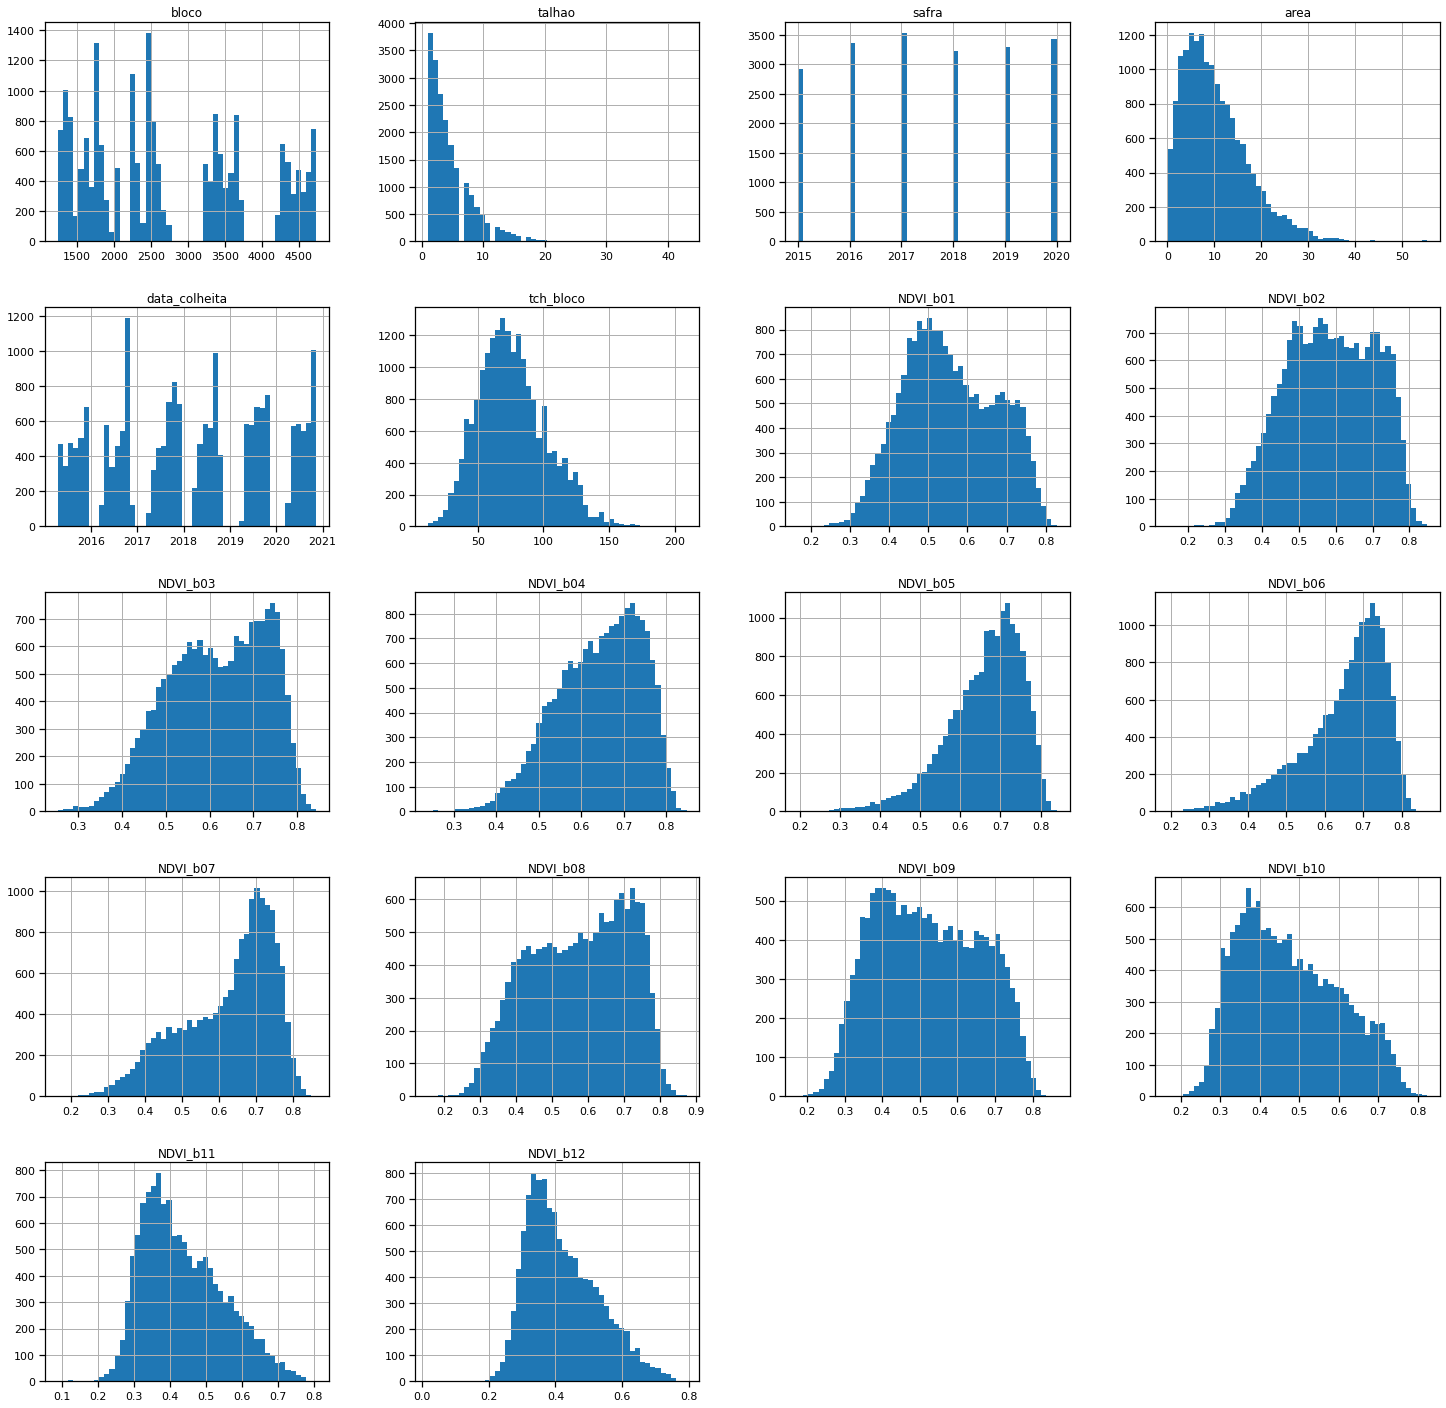

In [319]:
df.hist(bins=50,figsize=(25, 25))

plt.show()

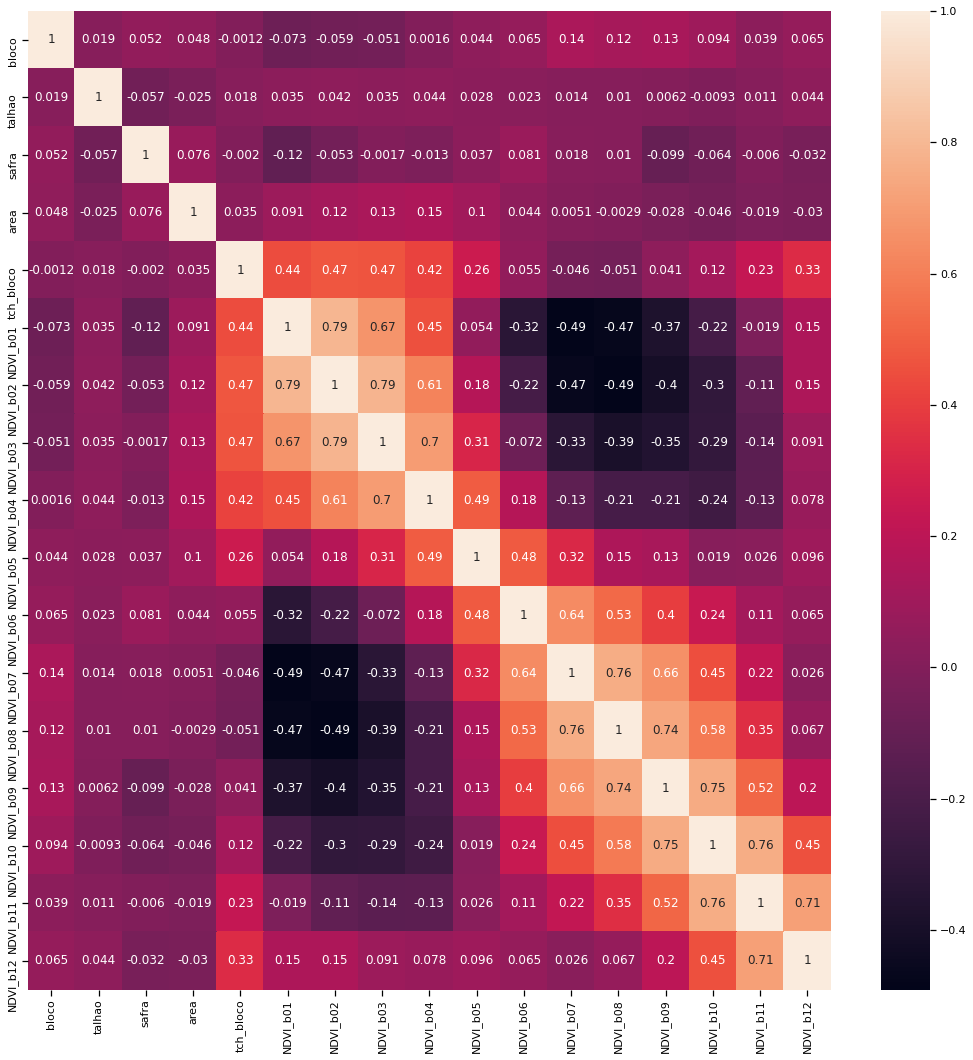

In [320]:
plt.figure(figsize=(18, 18))
sns.heatmap(data=df.corr(),annot=True)
sns.set_context("notebook", font_scale=1)
plt.show()

### Divisão em dados de treino e de teste

In [321]:
treino = df[df['safra']<2019]
teste = df[df['safra']==2019]

----

### Preparação dos dados

As linhas do dataset apresentam a data da colheita e a área referente ao talhão, mas as toneladas de cana-de-açúcar coletads referente ao bloco. Para ficarmos com uma medida mais precisa do quanto foi colhido em cada dia, vamos dividat as toneladas coletadas no bloco entre os talhões, usando como referência a área de cada talhão e assumindo que a colheita é diretamente proporcional à área.

Vamos retirar a área de ambos os dataset, treino e teste, pela razão já explicada anteriormente. Além disso, vamos agrupar os dados do dataset de teste por bloco.

In [322]:
'''
area_bloco = df.groupby(['bloco','safra']).sum()['area'].to_frame().reset_index()
treino['tch_talhao'] = np.nan

for i in range(len(treino)):
    treino.loc[i,'tch_talhao'] = treino.loc[i,'tch_bloco']*treino.loc[i,'area']/area_bloco[(area_bloco.bloco == treino.loc[i,'bloco'])&(area_bloco.safra == treino.loc[i,'safra'])]['area'].sum()
    '''

"\narea_bloco = df.groupby(['bloco','safra']).sum()['area'].to_frame().reset_index()\ntreino['tch_talhao'] = np.nan\n\nfor i in range(len(treino)):\n    treino.loc[i,'tch_talhao'] = treino.loc[i,'tch_bloco']*treino.loc[i,'area']/area_bloco[(area_bloco.bloco == treino.loc[i,'bloco'])&(area_bloco.safra == treino.loc[i,'safra'])]['area'].sum()\n    "

In [323]:
treino.head()

,bloco,talhao,safra,area,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
0,1239,1,2015,15.53,2015-10-25,75.88,0.622972,NaN,0.712402,0.693089,0.743105,0.805768,0.711357,0.767734,0.650449,NaN,0.241302,NaN
1,1243,1,2015,13.69,2015-07-14,65.22,0.677335,NaN,0.651432,NaN,0.721786,0.641068,NaN,0.337117,0.323262,0.289830,0.279747,0.262570
2,1243,2,2015,4.63,2015-07-15,65.22,0.632256,NaN,0.736531,0.560717,0.682829,0.582140,NaN,0.317600,0.298278,NaN,NaN,NaN
3,1243,7,2015,4.95,2015-07-16,65.22,0.570271,0.463221,0.702480,0.590163,0.664030,0.602534,NaN,0.386727,0.321662,NaN,NaN,NaN
4,1244,4,2015,8.66,2015-05-13,96.91,0.709576,0.454723,0.734945,0.722006,NaN,0.494456,0.401426,0.364672,0.367147,0.387163,0.452122,0.516717


In [324]:
treino = treino.sort_values(['bloco','talhao']).reset_index(drop=True)
teste = teste.sort_values(['bloco','talhao']).reset_index(drop=True)
X_treino = treino.drop(['area'],axis=1)
y_treino = treino[['area']]
X_teste = teste.drop(['area'],axis=1)
#y_teste = teste.drop_duplicates('bloco').reset_index()['tch_bloco'].to_frame()
y_teste = teste[['area']]

### Preparação dos dados para utilização no modelo

Antes de começar a treinar o modelo, é preciso fazer mais alguns ajustes no dataset.

Primeiro, vamos construir um Pipeline para ser utilizado junto com o modelo e fazer a imputação dos dados de NDVI que estão faltando usando o KNN imputer.

Segundo, vamos usar o OneHotEnconder para tratar as variáveis categóricas. Antes de realizar essa transformação, vamos unir o código do bloco com o do talão em um único código, de modo que possamos fazer o OneHotEnconder uma única vez.

In [325]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def estimator_transf(estimator):
    imputer = KNNImputer()
    pipeline = Pipeline(steps=[('i', imputer), ('m', estimator)])
    return pipeline

def estimator_scaler(estimator):
    imputer = KNNImputer()
    scaler = StandardScaler()
    pipeline = Pipeline(steps=[('i', imputer),('s',scaler),('model', estimator)])
    return pipeline 

In [326]:
import datetime as dt

X_treino_transf = X_treino.copy()
X_treino_transf['data_colheita'] = X_treino_transf['data_colheita'].map(dt.datetime.toordinal)
X_treino_transf.head()

,bloco,talhao,safra,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
0,1236,1,2016,736157,101.68,0.660357,0.712407,0.682959,NaN,0.378934,NaN,NaN,0.432385,0.589786,0.564760,NaN,NaN
1,1236,1,2017,736533,86.43,0.359089,0.683225,0.570371,0.722969,0.792568,NaN,NaN,NaN,0.589414,0.467347,0.446032,0.297526
2,1236,1,2018,736902,60.10,0.509706,0.553962,0.648584,0.738972,0.792210,0.780096,NaN,0.656676,0.438491,0.348275,0.286659,0.285387
3,1236,2,2016,736151,101.68,0.628659,0.628896,0.617167,0.527482,0.611054,NaN,NaN,0.371698,0.383678,0.318137,NaN,NaN
4,1236,2,2017,736643,86.43,0.423355,0.425829,0.460654,0.487857,0.530614,0.552597,0.587656,0.648282,NaN,0.549427,NaN,NaN


In [337]:
X_treino_transf2 = X_treino.copy()
X_treino_transf2['data_colheita'] = X_treino_transf2['data_colheita'].dt.month
X_treino_transf2['bloco-t'] = X_treino_transf2['bloco'].astype(str) + X_treino_transf2['talhao'].astype(str)
X_treino_transf2['bloco-t'].astype(int)
X_treino_transf2 = X_treino_transf2.drop(['bloco','talhao'],axis=1)

In [338]:
X_treino_transf2.head()

,safra,data_colheita,tch_bloco,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12,bloco-t
0,2016,7,101.68,0.660357,0.712407,0.682959,NaN,0.378934,NaN,NaN,0.432385,0.589786,0.564760,NaN,NaN,12361
1,2017,7,86.43,0.359089,0.683225,0.570371,0.722969,0.792568,NaN,NaN,NaN,0.589414,0.467347,0.446032,0.297526,12361
2,2018,7,60.10,0.509706,0.553962,0.648584,0.738972,0.792210,0.780096,NaN,0.656676,0.438491,0.348275,0.286659,0.285387,12361
3,2016,7,101.68,0.628659,0.628896,0.617167,0.527482,0.611054,NaN,NaN,0.371698,0.383678,0.318137,NaN,NaN,12362
4,2017,11,86.43,0.423355,0.425829,0.460654,0.487857,0.530614,0.552597,0.587656,0.648282,NaN,0.549427,NaN,NaN,12362


In [ ]:
'''from sklearn.preprocessing import OneHotEncoder

X_treino_transf['bloco-t'] = X_treino_transf['bloco'].astype(str) + X_treino_transf['talhao'].astype(str)
X_treino_transf = X_treino_transf.drop(['bloco','talhao'],axis=1)

model = OneHotEncoder()
X_treino_OneHot = pd.DataFrame(model.fit_transform(X_treino_transf['bloco-t'].to_numpy().reshape(-1,1)).toarray(),
                  columns=X_treino_transf['bloco-t'].unique()
                )
X_treino_transf = X_treino_transf.join(X_treino_OneHot)'''

### Treinando o modelo

Vamos testar diversos modelos de regressão para ver qual tem a melhor performance. Os modelos testatados serão:

1. Regressão Linear
2. Regressão Ridge
3. Regressão Lasso
4. Elastic Net
5. KNN
6. Árvore de Decisão

Testaremos também alguns modelos de ensemble:

1. AdaBoost
2. Random Forest
3. XGBoost

Os modelos serão avaliados com base em três métricas:

1. MAE
2. RMSE
3. R2

Conforme veremos a seguir, **os modelos com melhor desempenho foram o Random Forest e o XGBoost**.

In [327]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

def estimator_cross_val (model,estimator,pipe,matriz,rs,X,y):
    pipe_ = pipe(estimator)
    scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error','r2']
    kfold = KFold(n_splits=5, random_state=rs,shuffle=True)
    scores = cross_validate(pipe_,X,y,cv=kfold,scoring=scoring)
    
    mae_scores = -scores.get('test_neg_mean_absolute_error')
    mae_mean = mae_scores.mean()
    mae_std = mae_scores.std()
    
    rmse_scores = -scores.get('test_neg_root_mean_squared_error')
    rmse_mean = rmse_scores.mean()
    rmse_std = rmse_scores.std()
    
    r2_scores = scores.get('test_r2')
    r2_mean = r2_scores.mean()
    r2_std = r2_scores.std()
    
    results_ = [model,mae_mean,mae_std,rmse_mean,rmse_std,r2_mean,r2_std]
    results_ = pd.Series(results_, index = matriz.columns)
    results = matriz.append(results_,ignore_index=True)
    return results

In [341]:
rs = randrange(10000)

In [342]:
from random import randrange
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

matriz = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz = estimator_cross_val('Linear Regression',LinearRegression(),      estimator_transf,matriz,rs,X_treino_transf,y_treino)
print('ok')
matriz = estimator_cross_val('Ridge Regression', Ridge(),                 estimator_transf,matriz,rs,X_treino_transf,y_treino)
print('ok')
matriz = estimator_cross_val('Lasso',            Lasso(),                 estimator_transf,matriz,rs,X_treino_transf,y_treino)
print('ok')
matriz = estimator_cross_val('Elastic Net',      ElasticNet(),            estimator_transf,matriz,rs,X_treino_transf,y_treino)
print('ok')
matriz = estimator_cross_val('KNN',              KNeighborsRegressor(),   estimator_transf,matriz,rs,X_treino_transf,y_treino)
print('ok')
matriz = estimator_cross_val('CART',             DecisionTreeRegressor(), estimator_transf,matriz,rs,X_treino_transf,y_treino)
matriz

ok
ok
ok
ok
ok


,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,Linear Regression,5.335767,0.061614,6.859634,0.122961,0.035409,0.006769
1,Ridge Regression,5.335848,0.061515,6.859499,0.122805,0.035446,0.006718
2,Lasso,5.442164,0.047885,6.968519,0.110004,0.004492,0.002558
3,Elastic Net,5.439195,0.049048,6.966868,0.110669,0.004966,0.002765
4,KNN,5.114973,0.139687,6.775269,0.128718,0.058455,0.033610
5,CART,6.440707,0.075826,8.775201,0.126194,-0.579059,0.034546


In [343]:
matriz2 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz2 = estimator_cross_val('Linear Regression',LinearRegression(),      estimator_scaler,matriz2,rs,X_treino_transf,y_treino)
print('ok')
matriz2 = estimator_cross_val('Ridge Regression', Ridge(),                 estimator_scaler,matriz2,rs,X_treino_transf,y_treino)
print('ok')
matriz2 = estimator_cross_val('Lasso',            Lasso(),                 estimator_scaler,matriz2,rs,X_treino_transf,y_treino)
print('ok')
matriz2 = estimator_cross_val('Elastic Net',      ElasticNet(),            estimator_scaler,matriz2,rs,X_treino_transf,y_treino)
print('ok')
matriz2 = estimator_cross_val('KNN',              KNeighborsRegressor(),   estimator_scaler,matriz2,rs,X_treino_transf,y_treino)
print('ok')
matriz2 = estimator_cross_val('CART',             DecisionTreeRegressor(), estimator_scaler,matriz2,rs,X_treino_transf,y_treino)
matriz2

ok
ok
ok
ok
ok


,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,Linear Regression,5.335767,0.061614,6.859634,0.122961,0.035409,0.006769
1,Ridge Regression,5.335815,0.061472,6.859540,0.122753,0.035435,0.006660
2,Lasso,5.464734,0.045658,6.985040,0.106883,-0.000246,0.000218
3,Elastic Net,5.432845,0.050107,6.948512,0.107998,0.010195,0.001145
4,KNN,4.964974,0.102050,6.575788,0.089843,0.113217,0.021822
5,CART,6.448621,0.112789,8.748973,0.173035,-0.569673,0.046699


In [344]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

matriz3 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz3 = estimator_cross_val('AdaBoost',      AdaBoostRegressor(),                    estimator_transf,matriz3,rs,X_treino_transf,y_treino)
print('ok')
matriz3 = estimator_cross_val('Random Forest', RandomForestRegressor(random_state=rs), estimator_transf,matriz3,rs,X_treino_transf,y_treino)
print('ok')
matriz3 = estimator_cross_val('XGBoost',       XGBRegressor(random_state=rs),          estimator_transf,matriz3,rs,X_treino_transf,y_treino)

matriz3

ok
ok


,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,AdaBoost,6.679954,0.142728,7.874578,0.115494,-0.272629,0.058874
1,Random Forest,4.690800,0.081717,6.131035,0.126804,0.229441,0.012088
2,XGBoost,4.684505,0.084102,6.164837,0.123592,0.220849,0.014935


In [345]:
matriz4 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz4 = estimator_cross_val('AdaBoost',      AdaBoostRegressor(),                    estimator_scaler,matriz4,rs,X_treino_transf,y_treino)
print('ok')
matriz4 = estimator_cross_val('Random Forest', RandomForestRegressor(random_state=rs), estimator_scaler,matriz4,rs,X_treino_transf,y_treino)
print('ok')
matriz4 = estimator_cross_val('XGBoost',       XGBRegressor(random_state=rs),          estimator_scaler,matriz4,rs,X_treino_transf,y_treino)

matriz4

ok
ok


,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,AdaBoost,6.756900,0.247040,7.951614,0.241338,-0.298859,0.096650
1,Random Forest,4.690879,0.082420,6.131096,0.127699,0.229432,0.011996
2,XGBoost,4.684132,0.085696,6.162542,0.121545,0.221431,0.014338


In [346]:
matriz = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz = estimator_cross_val('Linear Regression',LinearRegression(),      estimator_transf,matriz,rs,X_treino_transf2,y_treino)
print('ok')
matriz = estimator_cross_val('Ridge Regression', Ridge(),                 estimator_transf,matriz,rs,X_treino_transf2,y_treino)
print('ok')
matriz = estimator_cross_val('Lasso',            Lasso(),                 estimator_transf,matriz,rs,X_treino_transf2,y_treino)
print('ok')
matriz = estimator_cross_val('Elastic Net',      ElasticNet(),            estimator_transf,matriz,rs,X_treino_transf2,y_treino)
print('ok')
matriz = estimator_cross_val('KNN',              KNeighborsRegressor(),   estimator_transf,matriz,rs,X_treino_transf2,y_treino)
print('ok')
matriz = estimator_cross_val('CART',             DecisionTreeRegressor(), estimator_transf,matriz,rs,X_treino_transf2,y_treino)
matriz

ok
ok
ok
ok
ok


,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,Linear Regression,5.350116,0.046686,6.873107,0.110900,0.031572,0.003889
1,Ridge Regression,5.350244,0.046829,6.872983,0.111012,0.031608,0.003900
2,Lasso,5.453989,0.049028,6.977366,0.110311,0.001966,0.001095
3,Elastic Net,5.444947,0.051999,6.966731,0.112193,0.005014,0.002303
4,KNN,4.819447,0.057327,6.422796,0.045745,0.153864,0.021741
5,CART,6.455378,0.125596,8.796612,0.223709,-0.586763,0.058708


In [347]:
matriz2 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz2 = estimator_cross_val('Linear Regression',LinearRegression(),      estimator_scaler,matriz2,rs,X_treino_transf2,y_treino)
print('ok')
matriz2 = estimator_cross_val('Ridge Regression', Ridge(),                 estimator_scaler,matriz2,rs,X_treino_transf2,y_treino)
print('ok')
matriz2 = estimator_cross_val('Lasso',            Lasso(),                 estimator_scaler,matriz2,rs,X_treino_transf2,y_treino)
print('ok')
matriz2 = estimator_cross_val('Elastic Net',      ElasticNet(),            estimator_scaler,matriz2,rs,X_treino_transf2,y_treino)
print('ok')
matriz2 = estimator_cross_val('KNN',              KNeighborsRegressor(),   estimator_scaler,matriz2,rs,X_treino_transf2,y_treino)
print('ok')
matriz2 = estimator_cross_val('CART',             DecisionTreeRegressor(), estimator_scaler,matriz2,rs,X_treino_transf2,y_treino)
matriz2

ok
ok
ok
ok
ok


,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,Linear Regression,5.350116,0.046686,6.873107,0.110900,0.031572,0.003889
1,Ridge Regression,5.350117,0.046687,6.873104,0.110901,0.031573,0.003889
2,Lasso,5.464734,0.045658,6.985040,0.106883,-0.000246,0.000218
3,Elastic Net,5.429486,0.049288,6.944914,0.106516,0.011213,0.001291
4,KNN,4.999605,0.083012,6.604830,0.105258,0.105572,0.015075
5,CART,6.487818,0.126248,8.815842,0.216656,-0.593988,0.064195


In [348]:
matriz3 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz3 = estimator_cross_val('AdaBoost',      AdaBoostRegressor(),                    estimator_transf,matriz3,rs,X_treino_transf2,y_treino)
print('ok')
matriz3 = estimator_cross_val('Random Forest', RandomForestRegressor(random_state=rs), estimator_transf,matriz3,rs,X_treino_transf2,y_treino)
print('ok')
matriz3 = estimator_cross_val('XGBoost',       XGBRegressor(random_state=rs),          estimator_transf,matriz3,rs,X_treino_transf2,y_treino)

matriz3

ok
ok


,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,AdaBoost,6.598401,0.416514,7.797452,0.449231,-0.248226,0.117575
1,Random Forest,4.724947,0.067038,6.172132,0.121598,0.219022,0.013599
2,XGBoost,4.702545,0.069280,6.211514,0.099887,0.208873,0.016166


In [349]:
matriz4 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz4 = estimator_cross_val('AdaBoost',      AdaBoostRegressor(),                    estimator_scaler,matriz4,rs,X_treino_transf2,y_treino)
print('ok')
matriz4 = estimator_cross_val('Random Forest', RandomForestRegressor(random_state=rs), estimator_scaler,matriz4,rs,X_treino_transf2,y_treino)
print('ok')
matriz4 = estimator_cross_val('XGBoost',       XGBRegressor(random_state=rs),          estimator_scaler,matriz4,rs,X_treino_transf2,y_treino)

matriz4

ok
ok


,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,AdaBoost,6.465865,0.143510,7.661449,0.167457,-0.203942,0.046525
1,Random Forest,4.725407,0.067825,6.172013,0.124262,0.219056,0.014097
2,XGBoost,4.701488,0.069274,6.210034,0.100514,0.209255,0.016022


------

### Otimização do modelo

Vamos otimizar os parâmetros dos dois modelos que performaram melhor na etapa anterior: Random Forest e XGBoost.

Verificamos a seguir que o modelo XGBoost é melhor que o Random Forest e que há duas alternativas para o XGBoost:

1. MAE: 8.447729 (0.168514) RMSE: 14.061485 (0.499201) R2: 0.356354 (0.015137) with: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depht': 10, 'n_estimators': 1000, 'reg_lambda': 1}

2. MAE: 8.527504 (0.200549) RMSE: 14.004690 (0.583047) R2: 0.361760 (0.018208) with: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depht': 6, 'n_estimators': 1000, 'reg_lambda': 1}

A primeira alternativa apresenta os parâmetros que resultam no menor MAE, enquanto os parâmetros da segunda alternativa resultam no modelo com menor RMSE e maior R2. Visto que o valor do MAE da segunda alternativa é muito maior que o da primeira e que este segundo modelo é melhor nas outras duas métricas de avaliação, **vamos adotar o XGBoost com os parâmetros da segunda alternativa como nosso modelo**. 

In [350]:
imputer = KNNImputer()
X_treino_transf_im = pd.DataFrame(imputer.fit_transform(X_treino_transf),columns = X_treino_transf.columns)

In [351]:
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor(random_state=rs)
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
min_samples_split=[2,5,10]
scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error','r2']

# define grid search
grid = dict(n_estimators=n_estimators,
            max_features=max_features,
            min_samples_split=min_samples_split
           )

cv = KFold(n_splits=5, random_state=rs,shuffle=True)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=scoring,error_score=0,refit=False)
grid_result_RF = grid_search.fit(X_treino_transf_im,y_treino)

In [352]:
means_mae =  grid_result_RF.cv_results_['mean_test_neg_mean_absolute_error']
means_rmse = grid_result_RF.cv_results_['mean_test_neg_root_mean_squared_error']
means_r2 =   grid_result_RF.cv_results_['mean_test_r2']
stds_mae =   grid_result_RF.cv_results_['std_test_neg_mean_absolute_error']
stds_rmse =  grid_result_RF.cv_results_['std_test_neg_root_mean_squared_error']
stds_r2 =    grid_result_RF.cv_results_['std_test_r2']
params =     grid_result_RF.cv_results_['params']
for mean_mae, stdev_mae, mean_rmse, stdev_rmse, mean_r2, stdev_r2, param in zip(
    means_mae, stds_mae, means_rmse, stds_rmse, means_r2, stds_r2, params):
    print("MAE: %f (%f) RMSE: %f (%f) R2: %f (%f) with: %r" % (
        -mean_mae, stdev_mae, -mean_rmse, stdev_rmse, mean_r2, stdev_r2, param)
         )

MAE: 4.923829 (0.083629) RMSE: 6.442975 (0.125363) R2: 0.148847 (0.020637) with: {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10}
MAE: 4.683601 (0.090048) RMSE: 6.116633 (0.137610) R2: 0.233068 (0.014825) with: {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
MAE: 4.662741 (0.084492) RMSE: 6.085169 (0.129935) R2: 0.240944 (0.012182) with: {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 1000}
MAE: 4.890349 (0.072602) RMSE: 6.404270 (0.099327) R2: 0.159162 (0.004887) with: {'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 10}
MAE: 4.707991 (0.080754) RMSE: 6.139645 (0.122577) R2: 0.227244 (0.012677) with: {'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
MAE: 4.684743 (0.085315) RMSE: 6.109159 (0.129792) R2: 0.234936 (0.012776) with: {'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 1000}
MAE: 4.924950 (0.078746) RMSE: 6.412880 (0.122257) R2: 0.156920 (0.012857) with: {'max_feature

In [354]:
# define models and parameters
model = XGBRegressor(random_state=rs)
n_estimators = [10, 100, 1000]
max_depht = [3,6,10]
learning_rate = [0.01, 0.05, 0.1]
colsample_bytree = [0.3, 0.7]
lambda_values = [1, 10, 50, 100]

scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error','r2']

# define grid search
grid = dict(n_estimators=n_estimators,
            max_depht=max_depht,
            learning_rate=learning_rate,
            colsample_bytree=colsample_bytree,
            reg_lambda = lambda_values
           )

cv = KFold(n_splits=5, random_state=rs,shuffle=True)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=scoring,error_score=0,refit=False)
grid_result_XGB = grid_search.fit(X_treino_transf_im,y_treino)

In [355]:
means_mae =  grid_result_XGB.cv_results_['mean_test_neg_mean_absolute_error']
means_rmse = grid_result_XGB.cv_results_['mean_test_neg_root_mean_squared_error']
means_r2 =   grid_result_XGB.cv_results_['mean_test_r2']
stds_mae =   grid_result_XGB.cv_results_['std_test_neg_mean_absolute_error']
stds_rmse =  grid_result_XGB.cv_results_['std_test_neg_root_mean_squared_error']
stds_r2 =    grid_result_XGB.cv_results_['std_test_r2']
params =     grid_result_XGB.cv_results_['params']
for mean_mae, stdev_mae, mean_rmse, stdev_rmse, mean_r2, stdev_r2, param in zip(
    means_mae, stds_mae, means_rmse, stds_rmse, means_r2, stds_r2, params):
    print("MAE: %f (%f) RMSE: %f (%f) R2: %f (%f) with: %r" % (
        -mean_mae, stdev_mae, -mean_rmse, stdev_rmse, mean_r2, stdev_r2, param)
         )

MAE: 8.728312 (0.084801) RMSE: 11.124601 (0.117095) R2: -1.537767 (0.042299) with: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depht': 3, 'n_estimators': 10, 'reg_lambda': 1}
MAE: 8.733686 (0.085350) RMSE: 11.134140 (0.116774) R2: -1.542122 (0.042305) with: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depht': 3, 'n_estimators': 10, 'reg_lambda': 10}
MAE: 8.736583 (0.086482) RMSE: 11.143691 (0.117269) R2: -1.546484 (0.042405) with: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depht': 3, 'n_estimators': 10, 'reg_lambda': 50}
MAE: 8.739429 (0.086580) RMSE: 11.148826 (0.117500) R2: -1.548834 (0.042719) with: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depht': 3, 'n_estimators': 10, 'reg_lambda': 100}
MAE: 5.405771 (0.065361) RMSE: 7.604862 (0.128372) R2: -0.185646 (0.012866) with: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depht': 3, 'n_estimators': 100, 'reg_lambda': 1}
MAE: 5.437459 (0.063318) RMSE: 7.655931 (0.125106) R2: -0.201630 (0.011

----

### Avaliação do modelo

Agora utilizaremos os dados de teste para fazer a avaliação final do nosso modelo, para ver como ele vai performar com dados nunca vistos antes.

Antes de aplicar o modelo, precisamos fazer nos dados de teste os mesmos ajustes que fizemos nos dados de treino.

In [131]:
X_teste_transf = X_teste.copy()
X_teste_transf['data_colheita'] = X_teste_transf['data_colheita'].map(dt.datetime.toordinal)

imputer = KNNImputer()
imputer.fit(X_treino_transf)
X_teste_transf_im = pd.DataFrame(imputer.transform(X_teste_transf),columns = X_teste_transf.columns)

In [378]:
X_teste_transf = X_teste.copy()
X_teste_transf['data_colheita'] = X_teste_transf['data_colheita'].map(dt.datetime.toordinal)

model = XGBRegressor(random_state=rs,
                     colsample_bytree= 0.7,
                     learning_rate=0.05,
                     #max_depht=6, esse valor já é o default do modelo
                     n_estimators =1000,
                     reg_lambda=1
                    )

imputer = KNNImputer()
pipe = Pipeline(steps=[('i',imputer),('m',model)])

pipe.fit(X_treino_transf,y_treino)
yhat_teste = pipe.predict(X_teste_transf)
#yhat_teste_bloco = X_teste['bloco'].to_frame().join(pd.DataFrame(yhat_teste,columns=['tch_bloco'])).groupby('bloco').sum().reset_index(drop=True)

In [379]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

final_mae = mean_absolute_error(y_teste,yhat_teste)
final_mse = mean_squared_error(y_teste,yhat_teste)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_teste,yhat_teste)
print('MAE:  %.2f'%final_mae,'\nRMSE: %.2f'%final_rmse,'\nR2:   %.2f'%final_r2)

MAE:  6.07 
RMSE: 7.51 
R2:   -0.13


In [380]:
df[df.safra==2019][['bloco','area']].drop_duplicates().describe()

,bloco,area
count,3281.000000,3281.000000
mean,2781.861323,11.172615
std,1097.811192,7.063109
min,1236.000000,0.150000
25%,1764.000000,5.820000
50%,2499.000000,10.010000
75%,3580.000000,15.140000
max,4707.000000,55.330000
